In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv('/content/placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [5]:
df.shape

(100, 4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [4]:
df = df.iloc[:,1:]

In [5]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [6]:
import matplotlib.pyplot as plt

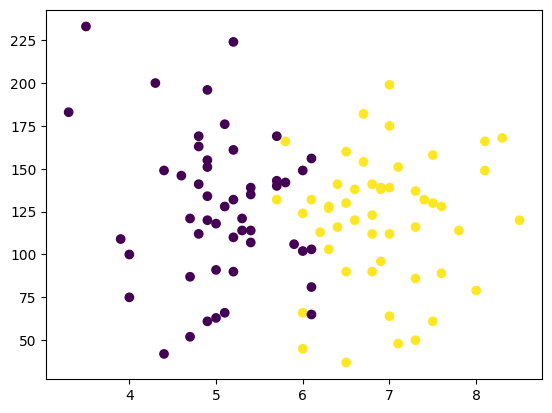

In [7]:
plt.scatter(df['cgpa'], df['iq'], c=df['placement'])

In [8]:
X = df.iloc[:,0:2]
Y = df.iloc[:,-1]

In [9]:
X

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [18]:
Y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

In [11]:
X_train

,cgpa,iq
2,5.3,121.0
73,4.9,61.0
45,6.0,66.0
75,4.8,169.0
81,5.4,107.0
...,...,...
51,4.8,141.0
60,6.9,139.0
20,6.6,120.0
12,5.4,139.0


In [12]:
Y_test

70    1
16    0
27    1
65    1
43    1
82    1
24    0
98    1
88    0
49    0
Name: placement, dtype: int64

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

In [16]:
X_train = scaler.fit_transform(X_train)

In [17]:
X_train

array([[-0.60358099, -0.04016007],
       [-0.95180079, -1.57820539],
       [ 0.00580366, -1.45003494],
       [-1.03885575,  1.19027618],
       [-0.51652604, -0.39903731],
       [-0.51652604, -0.21959869],
       [-1.21296565,  0.60069214],
       [ 0.87635317,  1.34408071],
       [ 0.70224327, -0.83481682],
       [ 1.13751802, -0.93735317],
       [ 0.44107842,  0.95956938],
       [-0.69063594,  0.2418149 ],
       [ 0.78929822,  0.39561943],
       [ 0.87635317,  1.95929884],
       [ 1.74690268, -1.11679179],
       [-1.03885575,  1.03647165],
       [-1.8223503 , -0.34776914],
       [ 0.17991356, -0.24523278],
       [-0.95180079,  0.29308308],
       [ 1.39868288, -0.86045091],
       [-0.95180079,  0.83139894],
       [-0.69063594, -0.32213505],
       [-1.1259107 , -0.91171908],
       [ 0.26696852,  0.13927855],
       [-0.25536119,  1.19027618],
       [ 0.44107842, -0.83481682],
       [ 0.35402347,  0.4725217 ],
       [ 0.00580366,  0.67759441],
       [-1.03885575,

In [19]:
X_test = scaler.transform(X_test)
X_test

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[-4.98508407, -3.13897162],
       [-5.81872616, -3.07523229],
       [-5.21244101, -3.14094294],
       [-3.62094247, -3.11334446],
       [-4.60615585, -3.12977213],
       [-4.83351278, -3.1981112 ],
       [-6.19765438, -3.14291426],
       [-4.98508407, -3.15474217],
       [-6.42501132, -3.12451528],
       [-5.66715487, -3.13371477]])

In [27]:
from sklearn.linear_model import LogisticRegression

In [28]:
clf = LogisticRegression()

In [31]:
clf.fit(X_train, Y_train)

LogisticRegression()

In [35]:
Y_pred = clf.predict(X_test)

In [25]:
Y_test

70    1
16    0
27    1
65    1
43    1
82    1
24    0
98    1
88    0
49    0
Name: placement, dtype: int64

In [37]:
from sklearn.metrics import accuracy_score

In [38]:
accuracy_score(Y_test,Y_pred)

0.4

In [39]:
from mlxtend.plotting import plot_decision_regions


<Axes: >

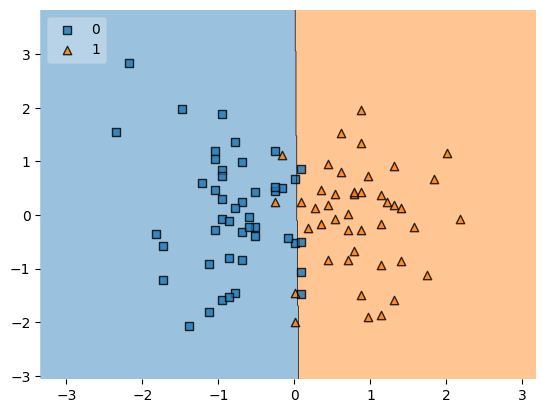

In [40]:
plot_decision_regions(X_train, Y_train.values, clf=clf, legend=2)

In [41]:
import pickle

In [42]:
pickle.dump(clf,open('model.pkl', 'wb'))